# Basics Of Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


# Load the Data

In [2]:
raw_data = pd.read_csv("Admittance.csv")
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1 , 'No' : 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


# Defining Independent and dependent variable

In [4]:
y =  data['Admitted']
x1 = data['SAT']

# Let's plot the data 

### Scatter Plot

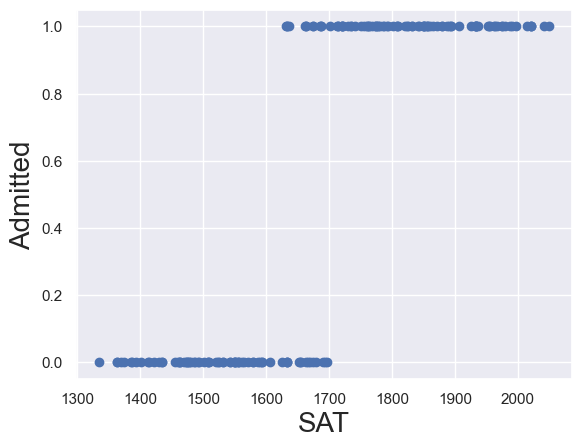

In [5]:
plt.scatter(x1,y)
plt.xlabel('SAT' , fontsize = 20)
plt.ylabel('Admitted' , fontsize = 20)
plt.show()

## Plot the regression line (linear regression line) to see if it suits the current situation

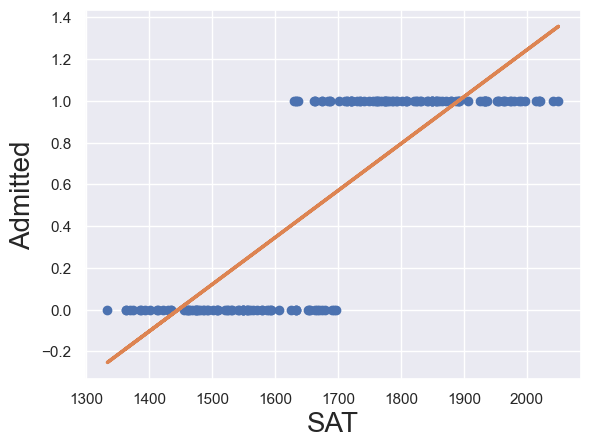

In [15]:
x =  sm.add_constant(x1)
# result =  sm.OLS(y ,x)
# result.fit()

reg_lin = sm.OLS(y,x)
result_lin = reg_lin.fit()

plt.scatter(x1,y , color = 'C0')

y_hat = x1*result_lin.params[1] + result_lin.params[0]

plt.plot(x1, y_hat , lw = 2.5 , color = 'C1')
plt.xlabel('SAT' , fontsize = 20)
plt.ylabel('Admitted' , fontsize = 20)
plt.show()
# print(type(result_lin))

### Plot with logistic  regression curve for this scenario as the data is categorical

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


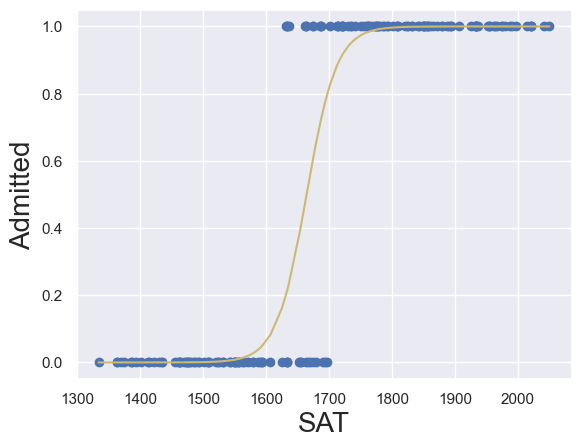

In [7]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# # Optimization terminated successfully.
#          Current function value: 0.137766
#          Iterations 10


def f(x,b0,b1):
    return np.array(np.exp(b0 + x*b1) / (1 + np.exp(b0 + x*b1)))

f_sorted = np.sort(f(x1 , results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1 , y , color ='C0' )
plt.xlabel('SAT', fontsize = 20 )
plt.ylabel("Admitted" , fontsize = 20)
plt.plot(x_sorted, f_sorted, color = 'C8')
plt.show()
